![Model Training](https://drive.google.com/uc?id=1ORAtpJyRa8Xb_UJQhsVWKZMeKGJa6QnZ)



In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [5]:
model = tf.keras.models.load_model('./')
print(model.outputs)

[<tf.Tensor 'dense/Identity_1:0' shape=(None, 2) dtype=float32>]


In [6]:
print(model.inputs)

[<tf.Tensor 'mobilenetv2_1.00_128_input_1:0' shape=(None, 128, 128, 3) dtype=float32>]


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [8]:
model.get_weights()

[array([[[[ 1.60920480e-03, -1.45352582e-22,  1.54917374e-01,
            2.29649822e-06,  1.49279218e-02, -5.39761280e-21,
            7.01060288e-21,  1.54408276e-21, -1.12762444e-01,
           -2.37320393e-01,  2.77190953e-01,  5.03320247e-02,
           -4.21045721e-01,  1.73461720e-01, -5.35633206e-01,
           -5.95900055e-04,  5.34933396e-02,  2.24988922e-01,
           -1.49572559e-22,  2.20291526e-03, -5.38195252e-01,
           -2.21309029e-02, -4.88732375e-22, -3.89234926e-21,
            2.84152419e-22, -1.23437764e-02, -1.14439223e-02,
            1.46071922e-22, -4.24997229e-03, -2.48236431e-09,
           -4.64977883e-02, -3.43741417e-01],
          [ 1.25032081e-03, -2.00014382e-22,  2.32940048e-01,
            2.78269158e-06,  1.99653972e-02,  7.11864268e-20,
            6.08769832e-21,  2.95990709e-22, -2.76436746e-01,
           -5.15990913e-01,  6.78669810e-01,  3.02553400e-02,
           -7.55709827e-01,  3.29371482e-01, -9.70950842e-01,
           -3.02999169e-

In [9]:
from PIL import Image
import numpy as np

In [10]:
def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[128,128])

In [11]:
def decode_img(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

In [28]:
classes=['demented','normal']

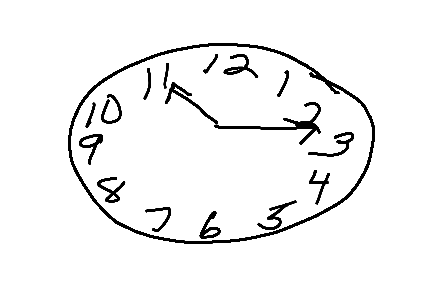

In [29]:
Image.open('good.png')

In [30]:
y_pred=np.argmax(model.predict(decode_img('good.png')),axis=1)

In [31]:
classes[y_pred[0]]

'normal'